<a href="https://colab.research.google.com/github/Camipinto/Laboratorio-de-Programacion-Cientifica-para-Ciencia-de-Datos/blob/main/Lab05/Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Laboratorio 5: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matias Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Ortiz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: **Camila Pinto L.**
- Nombre de alumno 2: **Camilo Ramírez C.**


### **Link de repositorio de GitHub:** https://github.com/Camilormz/MDS7202-labs


## Reglas:

- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 195 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
# try:
#     from google.colab import drive
#     drive.mount("/content/drive")
#     path = 'Dirección donde tiene los archivos en el Drive'
# except: 
print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [2]:
%%capture
# Descarga directa de los datos desde Internet
!wget -O online_retail_II.pickle https://drive.google.com/u/0/uc?id=1axhAS8lWGF462ceb_wvNZ6rbTvldYOxj&export=download

<p align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/MW4d8_LLYp8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="1" allowfullscreen></iframe></p>

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [3]:
from pandas.core.frame import DataFrame as PandasDF

df_retail: PandasDF = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype({
    "Invoice": "category",
    "StockCode": "category",
    "Description": str,
    "Customer ID": "category",
})
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> El análisis univariable busca comprender la distribución de los datos de cada atributo o columna presente en el *dataset*, lo que permite trabajar de forma adecuada con los mismos. El análisis multivariable busca entender la dependencia estadística entre los distintos atributos o columnas del *dataset*. El análisis de datos faltantes permite entender la naturaleza de la fuente de los datos y a su vez estimar la calidad del *dataset*. El beneficio de estudiar estos datos, es realizar una aproximación sobre que pre-procesamientos y modelos son más adecuados para tratar los mismos.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [6]:
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype
from plotly.graph_objs._figure import Figure as PlotlyFigure
from pandas.core.series import Series as PandasSeries
from pandas.api.types import is_numeric_dtype

def profile_serie(serie_in: PandasSeries, n_samples: int = 1000,
                  random_state: int = 42) -> None:
    """
    Profiles a Pandas series

    Parameters
    ----------
    serie_in: PandasSeries
        Pandas series to profile
    n_samples: int
        Number of samples to consider
    random_state: int
        Random seed
    """
    serie: PandasSeries = serie_in.copy()

    profile: PandasSeries = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # Operations if series type is numeric
    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(
        serie.memory_usage(index=True)
    ) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(index={
        "count": "Number of observations",
        "mean": "Mean",
        "std": "Std",
        "min": "Min",
        "max": "Max",
        "unique": "Unique",
        "top": "Top",
        "freq": "Freq",
    })
    no_outliers_fig: None = None

    # Numeric series
    if is_numeric_dtype(serie):

        sampled_serie: PandasSeries = serie.sample(
            n_samples, random_state=random_state
        )
        fig: PlotlyFigure = px.histogram(
            sampled_serie, marginal="box",
            title=f"{serie.name} - With Outliers"
        )

        no_outliers: PandasSeries = sampled_serie.loc[
            (np.abs(stats.zscore(sampled_serie)) < 3)
        ]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig: PlotlyFigure = px.histogram(
            no_outliers, marginal="box",
            title=f"{serie.name} - Without Outliers"
        )
    # Datetime or time-delta series
    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie: PandasSeries = serie.sample(
            n_samples, random_state=random_state
        )
        fig: PlotlyFigure = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name}"
        )
    # Another series type
    else:
        count: PandasSeries = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig: PlotlyFigure = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

In [14]:
profile_serie(df_retail['Customer ID']) 

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

    Análisis de la primera serie...

In [ ]:
profile_serie(...)

    Análisis de la primera n-esima serie...

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [5]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

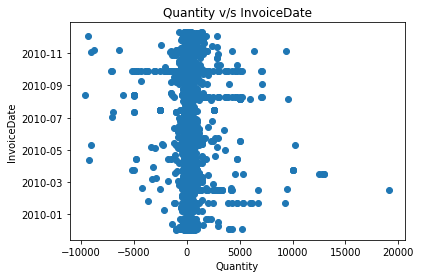

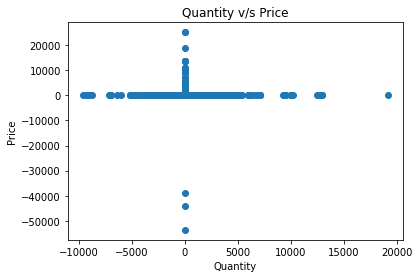

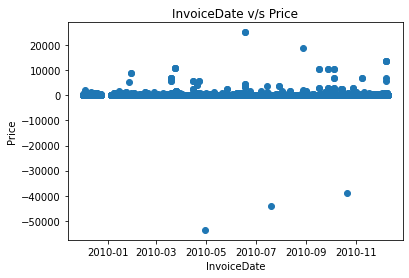

## Correlation:

## Missing Matrix:

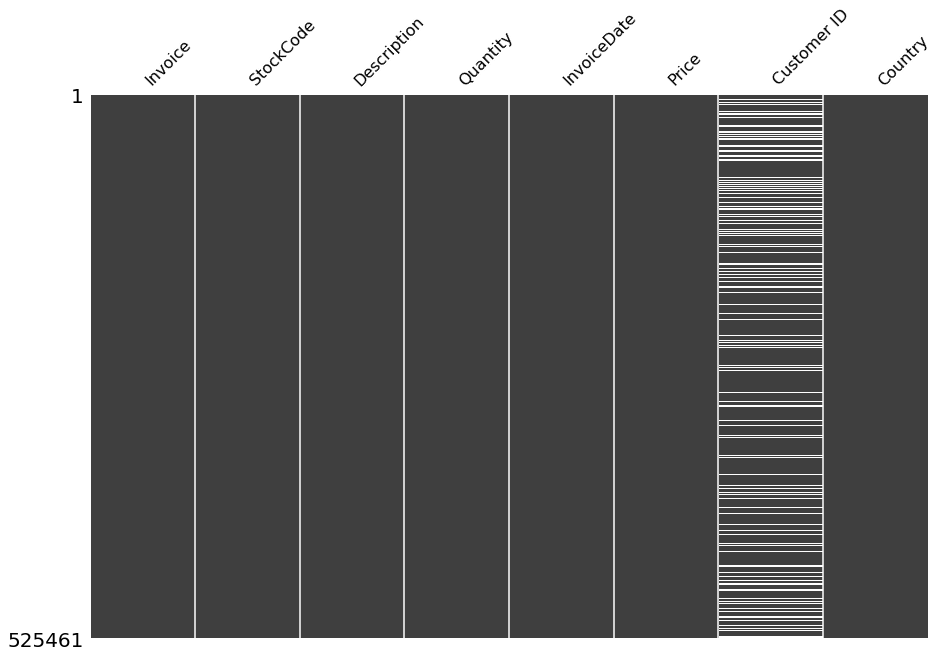

In [ ]:
profile_df(df_retail)

A partir de los análisis bivariados se puede ver que el dataset presenta valores errónos.
El gráfico "Quantity vs Invoice Date" muestra que hay varios registros de productos con cantidad negativa.

Y los gráficos "Quantity vs Price" y "Invoice Date vs Price" muestran que hay 3 registros de productos con precio negativo.

Por otro lado, a partir de la matriz de correlación se puede concluir, tal como era esperado, que la cantidad de cada producto no está correlacionada con su precio.

Finalmente, la matriz de datos faltantes muestra que hay valores faltantes en la columna "Customer ID"

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [7]:
def clean_df(dataframe_in):
    """
    Limpia un dataset y entrega una copia sin los valores erroneos

    Parameter
    ----------
    dataframe_in: dataframe entregado para ser limpiado

    """
    df = dataframe_in.copy()
    if df.duplicated().sum()>0:
        df = df.drop_duplicates()
    if df.isna().sum().sum()>0: 
        df = df.dropna()

    for col in list(df.columns):
        if is_numeric_dtype(df[col]):
            df = df[df[col]>0]

    return df

In [9]:
cleaned = clean_df(df_retail)

In [10]:
profile_serie(cleaned['Price']) 

## Price Profile

Type                            float64
Number of observations         400916.0
Mean                           3.305826
Std                           35.047719
Min                               0.001
25%                                1.25
50%                                1.95
75%                                3.75
Max                             10953.5
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                       62818.874688
Skew                         233.142978
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400730
Duplicate rows (%)              99.95 %
Total size in memory      6414656 bytes
dtype: object

In [11]:
profile_serie(cleaned['Quantity']) 

## Quantity Profile

Type                              int64
Number of observations         400916.0
Mean                          13.767418
Std                           97.638385
Min                                 1.0
25%                                 2.0
50%                                 5.0
75%                                12.0
Max                             19152.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        9418.363882
Skew                          79.281875
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400802
Duplicate rows (%)              99.97 %
Total size in memory      6414656 bytes
dtype: object

In [13]:
profile_serie(cleaned['Customer ID']) 

## Customer ID Profile

Type                           category
Number of observations         400916.0
Unique                           4312.0
Top                             14911.0
Freq                             5568.0
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400825
Duplicate rows (%)              99.98 %
Total size in memory      4176360 bytes
dtype: object

## Bivariant Analysis:

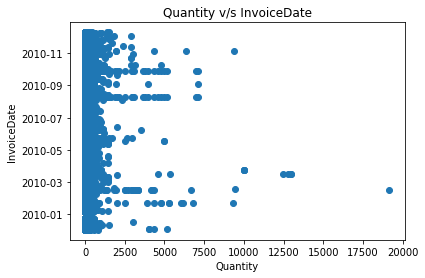

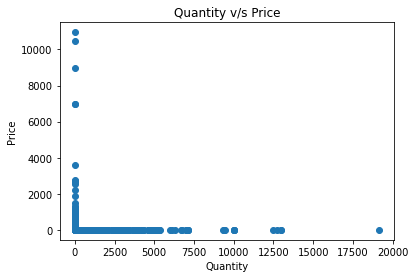

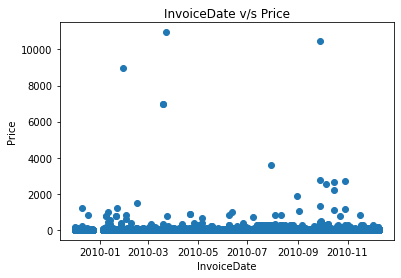

## Correlation:

## Missing Matrix:

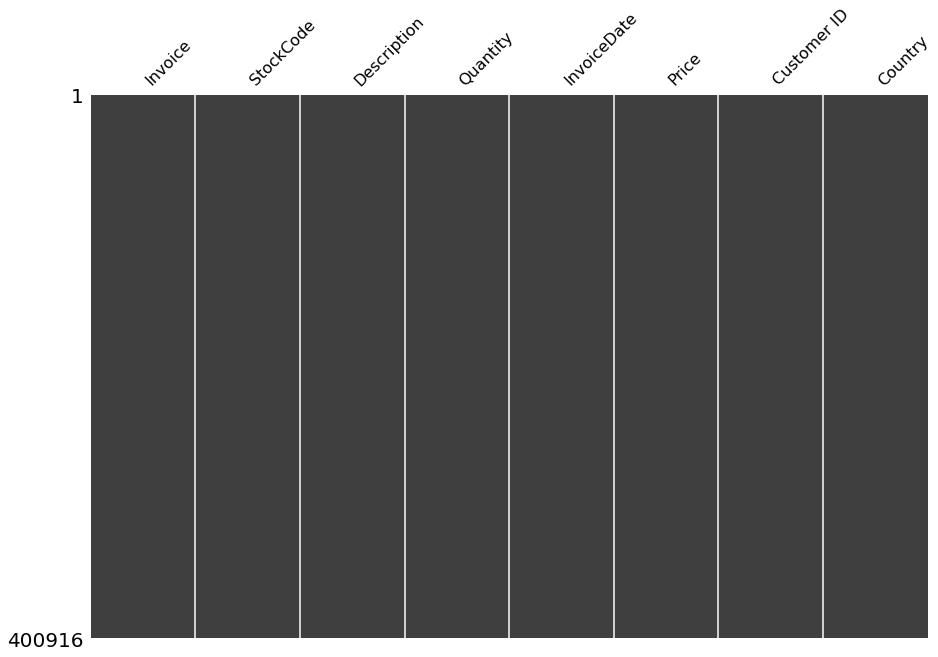

In [ ]:
profile_df(cleaned)

Luego de la limpieza se hace nuevamente el análisis exploratorio.
El nuevo dataset presenta 400.916 filas, en comparación con las 525.461 del dataset original.
Las 124.545 filas de diferencia fueron eliminadas por datos erróneos.

Se puede ver en el nuevo dataset que ya no hay registros de productos con precio negativo. Los valores de esta columna disminuyeron su desviación estándar de 146.13 a 35, por lo que luego de la limpieza se tienen precios más homogéneos.

Por otro lado solo hay registros de productos con cantidades mayores o iguales a 1

Ambos cambios en las columnas "Price" y "Quantity" se pueden ver numéricamente en el análisis univariado y gráficamente en el análisis bivariado.
Gracias a esta limpieza no existirán ventas negativas.


Por otro lado, el análisis univariado de "Customer ID" muestra que esta columna ya no presenta valores faltantes. Lo que se puede corroborar en la matriz de datos faltantes, en la cual se puede ver que todas las columnas están completas.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [ ]:
> Código Aquí

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [ ]:
def plot_ventas(dataframe):
    pass

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>